In [1]:
import pandas as pd

df = pd.read_excel(r'C:\Users\ebloom\Desktop\IRENA.xlsx',
                  na_values=["0", ".."])
df = df[df['Year'] == 2018]
df = df[df['Technology/source'] == 'GrandTotal']
df = df[df['Category'] == 'Final Consumption-Total']
df = df.round(2)
df = df.reset_index(drop=True)
##https://irena.org/Statistics/View-Data-by-Topic/Renewable-Energy-Balances/Final-Renewable-Energy-Consumption
df

,Category,Country,Technology/source,Year,TJ
0,Final Consumption-Total,Afghanistan,GrandTotal,2018.0,26605.74
1,Final Consumption-Total,Albania,GrandTotal,2018.0,29077.03
2,Final Consumption-Total,Algeria,GrandTotal,2018.0,3060.90
3,Final Consumption-Total,Argentina,GrandTotal,2018.0,267341.51
4,Final Consumption-Total,Armenia,GrandTotal,2018.0,10023.98
...,...,...,...,...,...
135,Final Consumption-Total,Uzbekistan,GrandTotal,2018.0,19636.93
136,Final Consumption-Total,Vanuatu,GrandTotal,2018.0,1069.25
137,Final Consumption-Total,Venezuela (Bolivarian Republic of),GrandTotal,2018.0,109348.54
138,Final Consumption-Total,Zambia,GrandTotal,2018.0,262416.71


<AxesSubplot:>

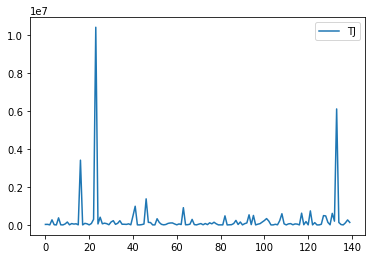

In [2]:
df.plot(y='TJ')

In [3]:
df['TJ'].isnull().values.any()

False

<AxesSubplot:xlabel='TJ', ylabel='Country'>

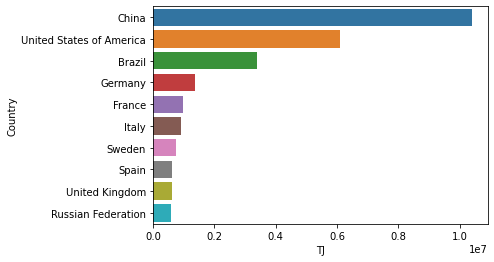

In [4]:
import seaborn as sns

df = df.sort_values(by='TJ', ascending=False)
top = df[:10]
sns.barplot(x=top['TJ'], y=top['Country'])

<AxesSubplot:xlabel='TJ', ylabel='Country'>

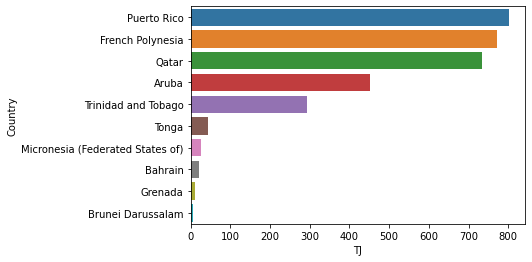

In [5]:
bottom = df[-10:]
sns.barplot(x=bottom['TJ'], y=bottom['Country'])

In [6]:
df.drop(columns={'Year'}, inplace=True)
print(df.describe())

                 TJ
count  1.400000e+02
mean   2.689371e+05
std    1.056803e+06
min    4.920000e+00
25%    7.802620e+03
50%    5.357705e+04
75%    1.471012e+05
max    1.039914e+07


<AxesSubplot:>

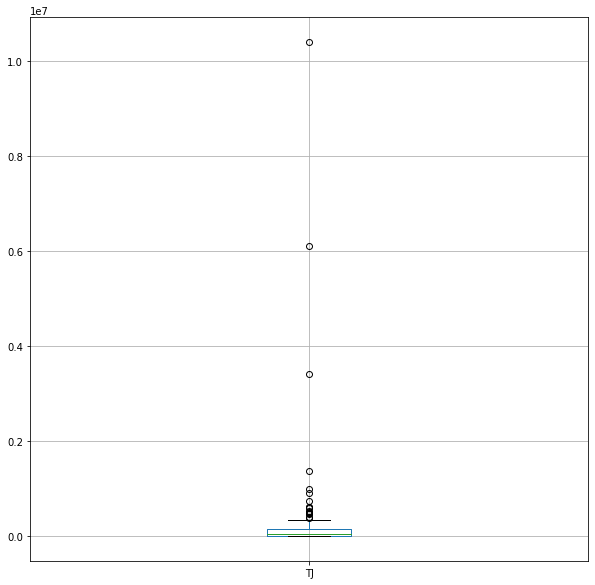

In [7]:
df.boxplot(figsize=(10,10))

array([[<AxesSubplot:title={'center':'TJ'}>]], dtype=object)

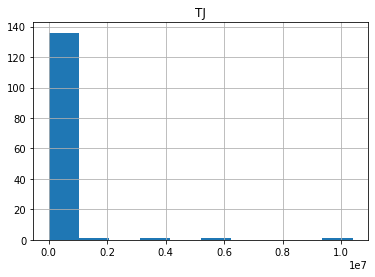

In [8]:
df.hist()

# GRO data import

In [9]:
GRO = pd.read_excel('https://recovery.smithschool.ox.ac.uk/wp-content/uploads/2021/05/20210524-Global-Recovery-Observatory-publicv2.xlsx', sheet_name="COVID-19 Measures",
                  na_values=[".."], usecols={'Country', 'Total Value, USD (billions)', 'Clean archetype?', 'Recovery?'})
index = GRO[GRO['Recovery?'] != 1].index
rec = GRO.drop(index, inplace=False)
rec = rec.groupby(["Country"], as_index=False).sum()
rec = rec.drop(columns=['Recovery?', 'Clean archetype?'])

index2 = GRO[GRO['Clean archetype?'] != 1].index
greenrec = GRO.drop(index2, inplace=False)
index = greenrec[greenrec['Recovery?'] != 1].index
greenrec.drop(index, inplace=True)
greenrec = greenrec.groupby(["Country"], as_index=False).sum()
greenrec = greenrec.drop(columns=['Recovery?', 'Clean archetype?'])

In [10]:
merge = greenrec.merge(rec, how='left', left_on='Country', right_on='Country')
merge['Percent'] = (merge['Total Value, USD (billions)_x'] / merge['Total Value, USD (billions)_y']) * 100
merge.rename(columns = {"Total Value, USD (billions)_x" : "Green recovery spending", "Total Value, USD (billions)_y" : "Recovery spending"}, inplace=True)
merge = merge.round({"Percent" : 2})
merge

,Country,Green recovery spending,Recovery spending,Percent
0,Argentina,0.00,6.82,0.00
1,Australia,2.30,130.95,1.76
2,Austria,0.38,1.60,23.75
3,Bangladesh,0.55,0.63,87.30
4,Brazil,0.28,0.54,51.85
5,Burkina Faso,0.00,0.00,NaN
6,Canada,21.67,38.70,55.99
7,Chile,0.45,3.13,14.38
8,China,51.88,427.52,12.14
9,Colombia,0.15,0.32,46.88


In [11]:
df.loc[df['Country']=='United States of America']
df.at[133, 'Country'] = 'United States'



In [12]:
GROmerge = merge.merge(df, how='left', left_on='Country', right_on='Country')
GROmerge

,Country,Green recovery spending,Recovery spending,Percent,Category,Technology/source,TJ
0,Argentina,0.00,6.82,0.00,Final Consumption-Total,GrandTotal,267341.51
1,Australia,2.30,130.95,1.76,NaN,NaN,NaN
2,Austria,0.38,1.60,23.75,Final Consumption-Total,GrandTotal,371003.09
3,Bangladesh,0.55,0.63,87.30,NaN,NaN,NaN
4,Brazil,0.28,0.54,51.85,Final Consumption-Total,GrandTotal,3406346.36
5,Burkina Faso,0.00,0.00,NaN,NaN,NaN,NaN
6,Canada,21.67,38.70,55.99,NaN,NaN,NaN
7,Chile,0.45,3.13,14.38,Final Consumption-Total,GrandTotal,295176.56
8,China,51.88,427.52,12.14,Final Consumption-Total,GrandTotal,10399138.67
9,Colombia,0.15,0.32,46.88,Final Consumption-Total,GrandTotal,405234.43


array([[<AxesSubplot:xlabel='Green recovery spending', ylabel='Green recovery spending'>,
        <AxesSubplot:xlabel='Recovery spending', ylabel='Green recovery spending'>,
        <AxesSubplot:xlabel='Percent', ylabel='Green recovery spending'>,
        <AxesSubplot:xlabel='TJ', ylabel='Green recovery spending'>],
       [<AxesSubplot:xlabel='Green recovery spending', ylabel='Recovery spending'>,
        <AxesSubplot:xlabel='Recovery spending', ylabel='Recovery spending'>,
        <AxesSubplot:xlabel='Percent', ylabel='Recovery spending'>,
        <AxesSubplot:xlabel='TJ', ylabel='Recovery spending'>],
       [<AxesSubplot:xlabel='Green recovery spending', ylabel='Percent'>,
        <AxesSubplot:xlabel='Recovery spending', ylabel='Percent'>,
        <AxesSubplot:xlabel='Percent', ylabel='Percent'>,
        <AxesSubplot:xlabel='TJ', ylabel='Percent'>],
       [<AxesSubplot:xlabel='Green recovery spending', ylabel='TJ'>,
        <AxesSubplot:xlabel='Recovery spending', ylabel='TJ'>,
  

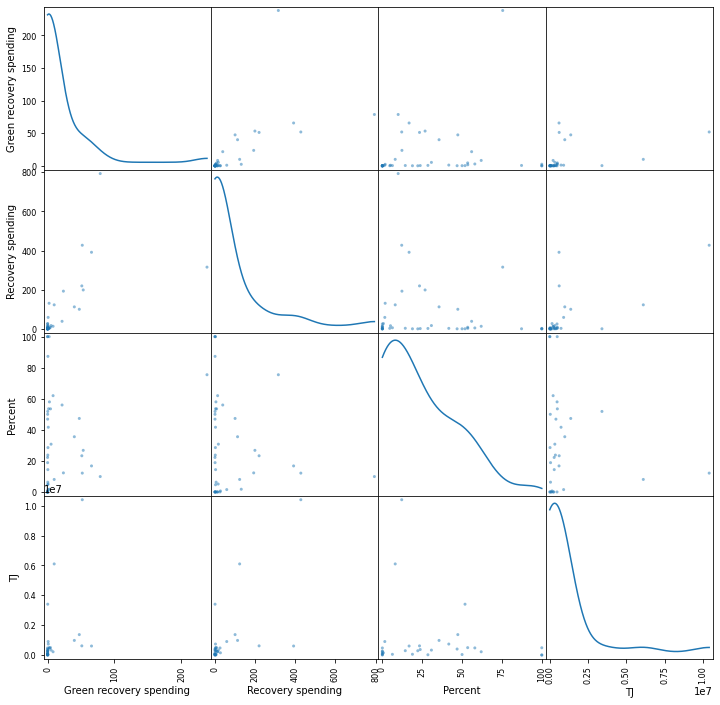

In [13]:
from pandas.plotting import scatter_matrix

scatter_matrix(GROmerge, alpha=0.5, diagonal='kde', figsize=(12,12))

In [14]:
corr = GROmerge.corr(method='pearson')
corr

,Green recovery spending,Recovery spending,Percent,TJ
Green recovery spending,1.000000,0.651449,0.172324,0.422048
Recovery spending,0.651449,1.000000,-0.121912,0.645840
Percent,0.172324,-0.121912,1.000000,-0.110016
TJ,0.422048,0.645840,-0.110016,1.000000


<AxesSubplot:>

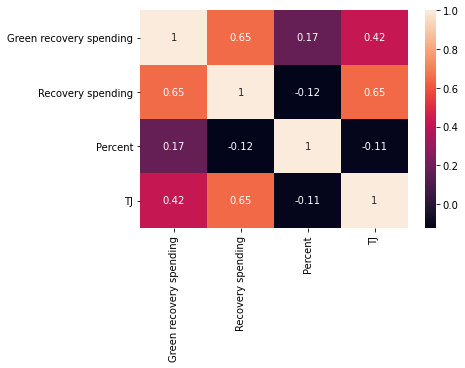

In [15]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)